В данном ноутбуке проведены исследования по 1-2 шагам из README:

    === ШАГ 1: Исследование данных ===
        ЭТАП 1: Исследование и анализ данных о клиентах
        ЭТАП 2: EDA
        ЭТАП 3: Сохранение данных

    === ШАГ 2: Подготовка инфраструктуры ===


=== ШАГ 1: Исследование данных ===
ЭТАП 1: Исследование и анализ данных о клиентах

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_data_safe(file_name):
    """
    Безопасно загружает CSV файл с обработкой ошибок
    """
    try:
        df = pd.read_csv(file_name)
        print(f"✅ УСПЕХ: {file_name} загружен")
        return df
    except FileNotFoundError:
        print(f"❌ ОШИБКА: Файл {file_name} не найден")
        return None
    except Exception as e:
        print(f"❌ ОШИБКА при загрузке {file_name}: {e}")
        return None

In [3]:
# Загрузка данных с обработкой ошибок
category_tree = load_data_safe('data/category_tree.csv')
events = load_data_safe('data/events.csv')
item_properties_part1 = load_data_safe('data/item_properties_part1.csv')
item_properties_part2 = load_data_safe('data/item_properties_part2.csv')


✅ УСПЕХ: data/category_tree.csv загружен
✅ УСПЕХ: data/events.csv загружен
✅ УСПЕХ: data/item_properties_part1.csv загружен
✅ УСПЕХ: data/item_properties_part2.csv загружен


In [4]:

# Выведем основную информацию о каждом датасете
print("=== category_tree ===")
category_tree.info()
category_tree.head(10)


=== category_tree ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


`category_tree.csv` — таблица из двух столбцов: «родительская категория» и «дочерняя категория». Типичный способ представления таблицы в виде дерева.

In [5]:
print("\n=== events ===")
events.info()
events.head(10)


=== events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


`events.csv` — таблица с логом событий:  
- `timestamp` — временная метка события,  
- `visitorid`— идентификатор пользователя,  
- `event` — событие (просмотр, добавление в корзину, покупка),  
- `itemid` — идентификатор товара,  
- `transactionid` — идентификатор транзакции (покупки)  

In [6]:
print("\n=== item_properties_part1 ===")
item_properties_part1.info()
item_properties_part1.head(10)


=== item_properties_part1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


`item_properties_part1.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [7]:
print("\n=== item_properties_part2 ===")
item_properties_part2.info()
item_properties_part2.head(10)


=== item_properties_part2 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
5,1433041200000,286407,202,820407
6,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
7,1437879600000,307534,888,150169 212349 1095303 824508 1257235 153900
8,1439089200000,102767,888,5135 790941 1055803 221748 122132 n12.000 1135...
9,1431831600000,215180,71,1096621


`item_properties_part2.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [ ]:
# Объединим item_properties_part1 и item_properties_part2 в один датафрейм
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)
print(f"Объединенная таблица item_properties: {item_properties.shape[0]:,} строк")

📊 Объединенная таблица item_properties: 20,275,902 строк


In [ ]:
# Проверка на пропуски
print(" ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"   - category_tree пропуски: {category_tree.isnull().sum().sum()}")
print(f"   - events пропуски: {events.isnull().sum().sum()}")
print(f"   - item_properties пропуски: {item_properties.isnull().sum().sum()}")


4. ❓ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
   - category_tree пропуски: 25
   - events пропуски: 2733644
   - item_properties пропуски: 0


In [10]:
print("\n📊 ПРОВЕРКА ДУБЛИКАТОВ:")

# Полные дубликаты
cat_duplicates = category_tree.duplicated().sum()
events_duplicates = events.duplicated().sum()
item_props_duplicates = item_properties.duplicated().sum()

print(f"   - category_tree: {cat_duplicates:,} полных дубликатов")
print(f"   - events: {events_duplicates:,} полных дубликатов") 
print(f"   - item_properties: {item_props_duplicates:,} полных дубликатов")


📊 ПРОВЕРКА ДУБЛИКАТОВ:
   - category_tree: 0 полных дубликатов
   - events: 460 полных дубликатов
   - item_properties: 0 полных дубликатов


In [12]:
# =============================================================================
# ОЧИСТКА И ПОДГОТОВКА ДАННЫХ
# =============================================================================

print("=" * 80)
print("ОЧИСТКА И ПОДГОТОВКА ДАННЫХ")
print("=" * 80)

# 1. Очистка дубликатов в events
print("1. 🧹 ОЧИСТКА ДУБЛИКАТОВ:")
initial_events_size = len(events)

if events_duplicates > 0:
    events = events.drop_duplicates()
    print(f"   ✅ Удалено {events_duplicates} полных дубликатов из events")

# Проверим частичные дубликаты в events (более опасные!)
events_key_duplicates = events.duplicated(subset=['timestamp', 'visitorid', 'itemid', 'event']).sum()
print(f"   - events частичные дубликаты (ключевые поля): {events_key_duplicates:,}")

if events_key_duplicates > 0:
    events = events.drop_duplicates(subset=['timestamp', 'visitorid', 'itemid', 'event'])
    print(f"   ✅ Удалено {events_key_duplicates} частичных дубликатов из events")

print(f"   📊 Размер events: {initial_events_size:,} → {len(events):,} строк")

# 2. Переименование столбцов в PEP8
print("\n2. 🏷️ ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):")

print("   До переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# Переименование согласно PEP8 (snake_case)
category_tree = category_tree.rename(columns={
    'categoryid': 'category_id',
    'parentid': 'parent_id'
})

events = events.rename(columns={
    'visitorid': 'visitor_id', 
    'itemid': 'item_id',
    'transactionid': 'transaction_id'
})

item_properties = item_properties.rename(columns={
    'itemid': 'item_id'
})

print("   После переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# 3. Детальный анализ пропусков
print("\n3. ❓ ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")

# В events
events_nulls = events.isnull().sum()
print(f"   - events:")
print(f"     transaction_id: {events_nulls['transaction_id']:,} пропусков")
print(f"     (это ожидаемо - пропуски для событий 'view' и 'addtocart')")

# В category_tree
category_nulls = category_tree.isnull().sum()
print(f"   - category_tree:")
print(f"     parent_id: {category_nulls['parent_id']:,} пропусков")
print(f"     (это корневые категории - ожидаемо)")

# В item_properties
item_props_nulls = item_properties.isnull().sum()
print(f"   - item_properties: {item_props_nulls.sum():,} пропусков")

# 4. Проверка целостности данных
print("\n4. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")

# В category_tree - проверка "сиротских" parent_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - category_tree 'сиротских' parent_id: {len(orphan_parents)}")

# Проверка уникальности category_id
cat_id_duplicates = category_tree.duplicated(subset=['category_id']).sum()
print(f"   - category_tree дубликаты category_id: {cat_id_duplicates}")

print("\n" + "=" * 80)
print("ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ")
print("=" * 80)
print(f"✅ events: {len(events):,} строк (удалено {initial_events_size - len(events):,} дубликатов)")
print(f"✅ category_tree: {len(category_tree):,} строк")
print(f"✅ item_properties: {len(item_properties):,} строк")
print(f"✅ Столбцы переименованы в PEP8")

ОЧИСТКА И ПОДГОТОВКА ДАННЫХ
1. 🧹 ОЧИСТКА ДУБЛИКАТОВ:
   ✅ Удалено 460 полных дубликатов из events
   - events частичные дубликаты (ключевые поля): 0
   📊 Размер events: 2,756,101 → 2,755,641 строк

2. 🏷️ ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):
   До переименования:
   - category_tree: ['categoryid', 'parentid']
   - events: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']
   - item_properties: ['timestamp', 'itemid', 'property', 'value']
   После переименования:
   - category_tree: ['category_id', 'parent_id']
   - events: ['timestamp', 'visitor_id', 'event', 'item_id', 'transaction_id']
   - item_properties: ['timestamp', 'item_id', 'property', 'value']

3. ❓ ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
   - events:
     transaction_id: 2,733,184 пропусков
     (это ожидаемо - пропуски для событий 'view' и 'addtocart')
   - category_tree:
     parent_id: 25 пропусков
     (это корневые категории - ожидаемо)
   - item_properties: 0 пропусков

4. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - category_tree '

ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE
1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parentid: 25

2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


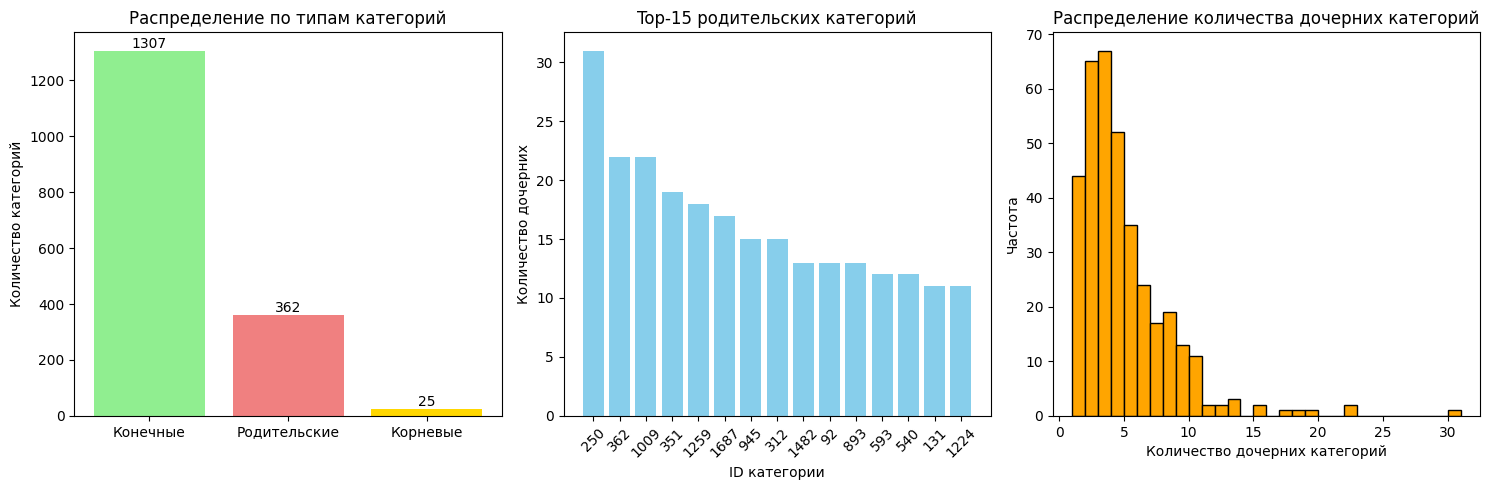

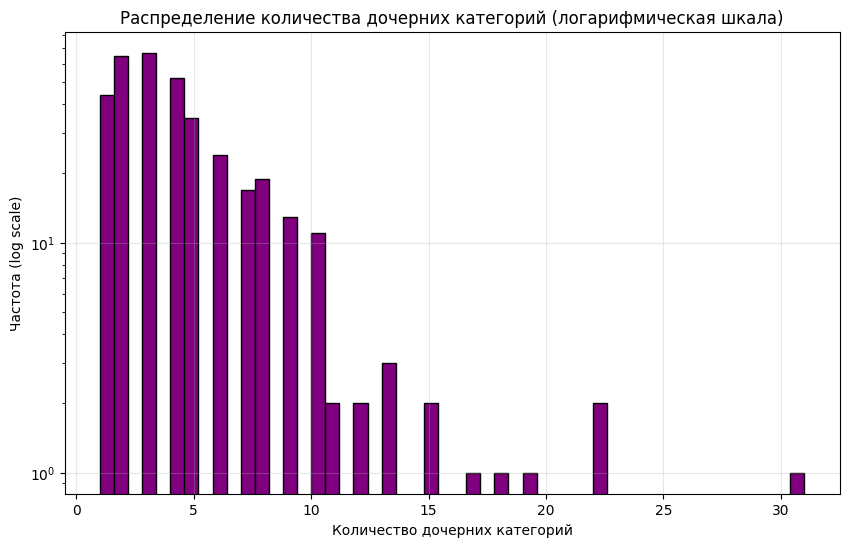


4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parentid (нет в categoryid): 0

6. 📊 СТАТИСТИКА:
        categoryid     parentid
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000

ВЫВОДЫ ПО CATEGORY_TREE:
✅ Всего 1,669 категорий в иерархии
✅ 25 корневых категорий (без родителя)
✅ 362 категорий имеют дочерние категории
✅ 1,307 конечных категорий (без дочерних)
✅ Максимальная ширина дерева: 31 дочерних у одного родителя
📊 Графики сохранены в папку 'eda_plots/' для MLflow


In [11]:
import os
import matplotlib.pyplot as plt

# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE")
print("=" * 80)

# 1. Базовая информация
print("1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['categoryid'].nunique():,}")
print(f"   - Пропуски в parentid: {category_tree['parentid'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parentid'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories = category_tree[category_tree['categoryid'].isin(category_tree['parentid'])]
print(f"   - Категорий, имеющих дочерние: {parent_categories['categoryid'].nunique():,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~category_tree['categoryid'].isin(category_tree['parentid'])]
print(f"   - Конечных категорий (без дочерних): {leaf_categories['categoryid'].nunique():,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parentid'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация с сохранением графиков
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
plt.bar(labels, category_types, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black')
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Дополнительные графики
# График 4: Распределение категорий (логарифмическая шкала)
plt.figure(figsize=(10, 6))
plt.hist(child_counts.values, bins=50, color='purple', edgecolor='black', log=True)
plt.title('Распределение количества дочерних категорий (логарифмическая шкала)')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)
plt.savefig('eda_plots/category_tree_distribution_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Детальный анализ топ-5 родительских категорий
print("\n4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 7. Проверка целостности данных
print("\n5. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parentid, но нет в categoryid
orphan_parents = set(category_tree['parentid'].dropna()) - set(category_tree['categoryid'])
print(f"   - 'Сиротских' parentid (нет в categoryid): {len(orphan_parents)}")

# 8. Статистика
print("\n6. 📊 СТАТИСТИКА:")
print(category_tree.describe())

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)
print(f"✅ Всего {len(category_tree):,} категорий в иерархии")
print(f"✅ {len(root_categories):,} корневых категорий (без родителя)")
print(f"✅ {len(parent_categories):,} категорий имеют дочерние категории") 
print(f"✅ {len(leaf_categories):,} конечных категорий (без дочерних)")
print(f"✅ Максимальная ширина дерева: {child_counts.max()} дочерних у одного родителя")
print(f"📊 Графики сохранены в папку 'eda_plots/' для MLflow")

ПОЛНЫЙ АНАЛИЗ CATEGORY_TREE
1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parent_id: 25

2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


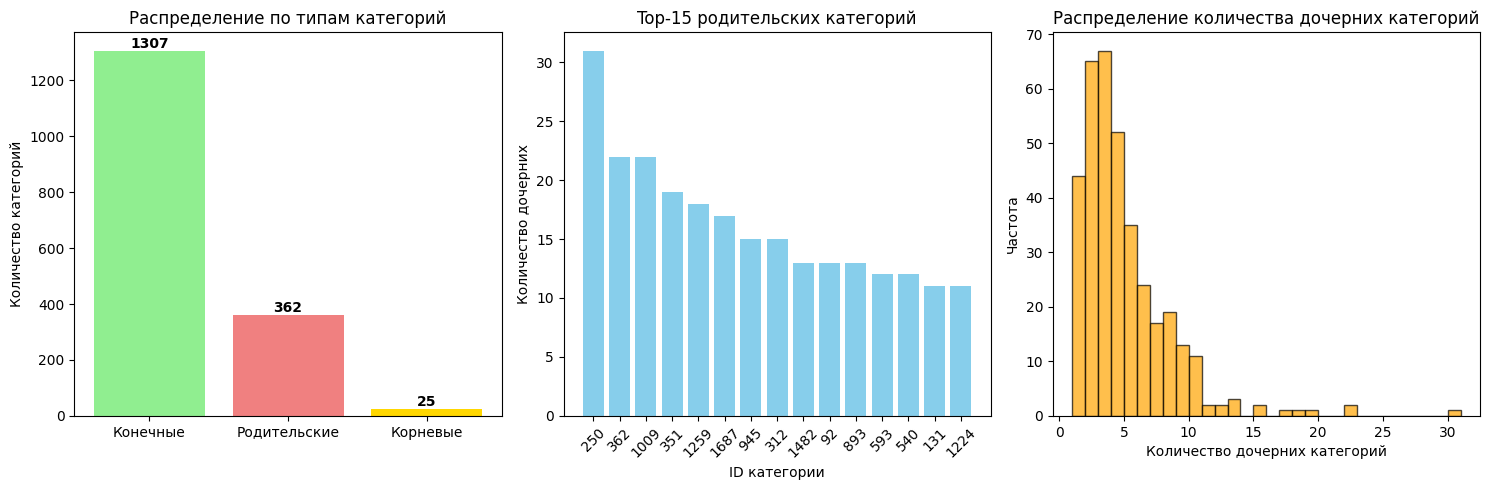


4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. 📊 СТАТИСТИКА:
       category_id    parent_id
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000

ИТОГОВЫЕ ВЫВОДЫ ПО CATEGORY_TREE
✅ КАЧЕСТВО ДАННЫХ:
   - Дубликаты: 0 (очищено)
   - Пропуски: 25 (корневые категории - ожидаемо)
   - Целостность: 0 сиротских категорий

✅ СТРУКТУРА ДЕРЕВА:
   - Всего категорий: 1,669
   - Корневых: 25 (основные разделы магазина)
   - Родительских: 362 (средний уровень вложенности)
   - Конечных: 1,307 (конкретные товарные группы)

✅ РАСПРЕДЕЛЕНИЕ:
   - Максимальная ширина: 31 дочерних у од

In [13]:
# =============================================================================
# ПОЛНЫЙ АНАЛИЗ CATEGORY_TREE
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("ПОЛНЫЙ АНАЛИЗ CATEGORY_TREE")
print("=" * 80)

# 1. Базовая информация
print("1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['category_id'].nunique():,}")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parent_id'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories_mask = category_tree['category_id'].isin(category_tree['parent_id'])
parent_categories = category_tree[parent_categories_mask]
print(f"   - Категорий, имеющих дочерние: {len(parent_categories):,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~parent_categories_mask]
print(f"   - Конечных категорий (без дочерних): {len(leaf_categories):,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parent_id'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
colors = ['lightgreen', 'lightcoral', 'gold']
plt.bar(labels, category_types, color=colors)
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Детальный анализ топ-5 родительских категорий
print("\n4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 6. Статистика
print("\n5. 📊 СТАТИСТИКА:")
print(category_tree.describe())

# =============================================================================
# ИТОГОВЫЕ ВЫВОДЫ ПО CATEGORY_TREE
# =============================================================================
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО CATEGORY_TREE")
print("=" * 80)

print("✅ КАЧЕСТВО ДАННЫХ:")
print(f"   - Дубликаты: {cat_duplicates} (очищено)")
print(f"   - Пропуски: {category_tree['parent_id'].isna().sum()} (корневые категории - ожидаемо)")
print(f"   - Целостность: {len(orphan_parents)} сиротских категорий")

print("\n✅ СТРУКТУРА ДЕРЕВА:")
print(f"   - Всего категорий: {len(category_tree):,}")
print(f"   - Корневых: {len(root_categories):,} (основные разделы магазина)")
print(f"   - Родительских: {len(parent_categories):,} (средний уровень вложенности)") 
print(f"   - Конечных: {len(leaf_categories):,} (конкретные товарные группы)")

print("\n✅ РАСПРЕДЕЛЕНИЕ:")
print(f"   - Максимальная ширина: {child_counts.max()} дочерних у одного родителя")
print(f"   - Средняя ширина: {child_counts.mean():.1f} дочерних на родителя")
print(f"   - Медианная ширина: {child_counts.median():.1f} дочерних на родителя")

print("\n🎯 ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ ДЛЯ РЕКОМЕНДАЦИЙ:")
print("   - Сбалансированная иерархия - подходит для рекомендаций")
print("   - Глубокая структура - можно использовать информацию о родительских категориях")
print("   - Категории-лидеры требуют особого внимания в рекомендациях")

print(f"\n📊 Графики сохранены в 'eda_plots/category_tree_analysis.png'")

ПОЛНЫЙ АНАЛИЗ CATEGORY_TREE
1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parent_id: 25

2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307
   - Проверка: 25 + 362 + 1307 = 1694 (должно быть 1669)

3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0
   - Стандартное отклонение: 3.6


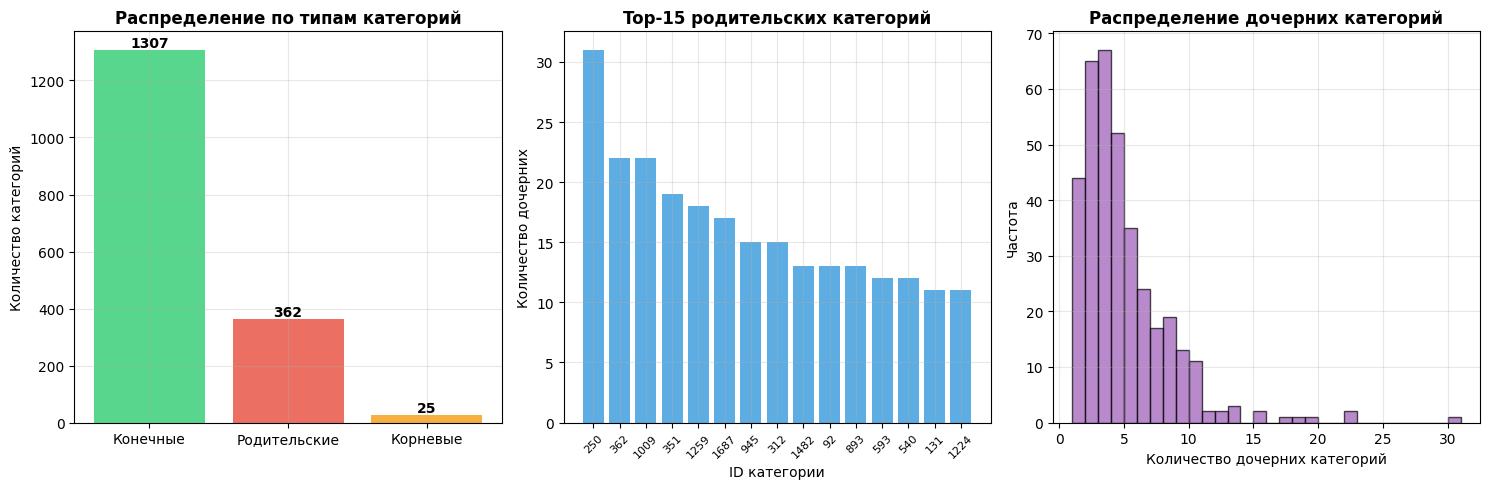


4. 📊 ЛОГАРИФМИЧЕСКАЯ ВИЗУАЛИЗАЦИЯ:


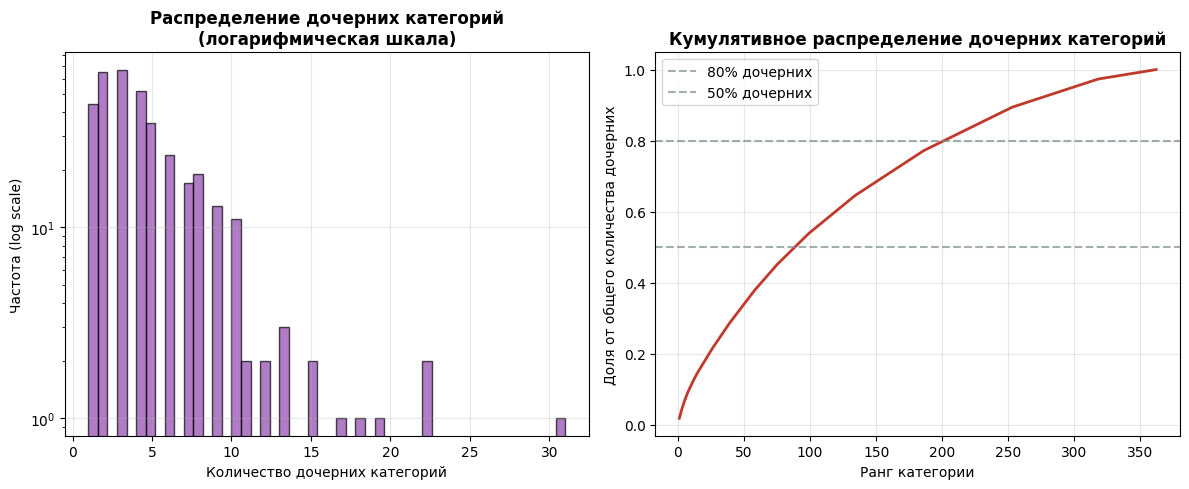


5. 📈 АНАЛИЗ 'ДЛИННОГО ХВОСТА' РАСПРЕДЕЛЕНИЯ:
   - 10% самых 'родительских' категорий содержат 27.0% всех дочерних связей
   - 20% самых 'родительских' категорий содержат 43.9% всех дочерних связей
   - Категории с 1 дочерней: 44
   - Категории с 2-5 дочерними: 219
   - Категории с 6+ дочерними: 99

6. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   Ранг | Category ID | Дочерних | Доля от всех дочерних
   --------------------------------------------------
    1    |        250 |       31 |   1.9%
    2    |        362 |       22 |   1.3%
    3    |       1009 |       22 |   1.3%
    4    |        351 |       19 |   1.2%
    5    |       1259 |       18 |   1.1%

7. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parent_id (нет в category_id): 0
   - Самоссылающихся категорий: 0

8. 📊 СТАТИСТИКА:
       category_id    parent_id
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.0000

In [15]:
# =============================================================================
# ПОЛНЫЙ ИСПРАВЛЕННЫЙ АНАЛИЗ CATEGORY_TREE
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("ПОЛНЫЙ АНАЛИЗ CATEGORY_TREE")
print("=" * 80)

# 1. Базовая информация
print("1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['category_id'].nunique():,}")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parent_id'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories_mask = category_tree['category_id'].isin(category_tree['parent_id'])
parent_categories = category_tree[parent_categories_mask]
print(f"   - Категорий, имеющих дочерние: {len(parent_categories):,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~parent_categories_mask]
print(f"   - Конечных категорий (без дочерних): {len(leaf_categories):,}")

# Проверка математики
total_calculated = len(root_categories) + len(parent_categories) + len(leaf_categories)
print(f"   - Проверка: {len(root_categories)} + {len(parent_categories)} + {len(leaf_categories)} = {total_calculated} (должно быть {len(category_tree)})")

# 3. Анализ распределения количества дочерних категорий
print("\n3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parent_id'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")
print(f"   - Стандартное отклонение: {child_counts.std():.1f}")

# 4. Визуализация - Основные графики
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
colors = ['#2ecc71', '#e74c3c', '#f39c12']
plt.bar(labels, category_types, color=colors, alpha=0.8)
plt.title('Распределение по типам категорий', fontsize=12, fontweight='bold')
plt.ylabel('Количество категорий')
plt.grid(True, alpha=0.3)
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=10)

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='#3498db', alpha=0.8)
plt.title('Top-15 родительских категорий', fontsize=12, fontweight='bold')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True, alpha=0.3)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
plt.title('Распределение дочерних категорий', fontsize=12, fontweight='bold')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Логарифмическая визуализация
print("\n4. 📊 ЛОГАРИФМИЧЕСКАЯ ВИЗУАЛИЗАЦИЯ:")

plt.figure(figsize=(12, 5))

# График 1: Распределение количества дочерних категорий (логарифмическая шкала)
plt.subplot(1, 2, 1)
plt.hist(child_counts.values, bins=50, color='#8e44ad', edgecolor='black', log=True, alpha=0.7)
plt.title('Распределение дочерних категорий\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)

# График 2: Кумулятивное распределение
plt.subplot(1, 2, 2)
sorted_counts = np.sort(child_counts.values)[::-1]
cumulative = np.cumsum(sorted_counts) / np.sum(sorted_counts)
plt.plot(range(1, len(sorted_counts) + 1), cumulative, color='#c0392b', linewidth=2)
plt.title('Кумулятивное распределение дочерних категорий', fontsize=12, fontweight='bold')
plt.xlabel('Ранг категории')
plt.ylabel('Доля от общего количества дочерних')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='#7f8c8d', linestyle='--', alpha=0.7, label='80% дочерних')
plt.axhline(y=0.5, color='#7f8c8d', linestyle='--', alpha=0.7, label='50% дочерних')
plt.legend()

plt.tight_layout()
plt.savefig('eda_plots/category_tree_log_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Анализ "длинного хвоста"
print("\n5. 📈 АНАЛИЗ 'ДЛИННОГО ХВОСТА' РАСПРЕДЕЛЕНИЯ:")
total_children = child_counts.sum()
top_10_percent = max(1, int(len(child_counts) * 0.1))
children_in_top_10 = child_counts.head(top_10_percent).sum()
percentage_top_10 = (children_in_top_10 / total_children) * 100

top_20_percent = max(1, int(len(child_counts) * 0.2))
children_in_top_20 = child_counts.head(top_20_percent).sum()
percentage_top_20 = (children_in_top_20 / total_children) * 100

print(f"   - 10% самых 'родительских' категорий содержат {percentage_top_10:.1f}% всех дочерних связей")
print(f"   - 20% самых 'родительских' категорий содержат {percentage_top_20:.1f}% всех дочерних связей")
print(f"   - Категории с 1 дочерней: {(child_counts == 1).sum()}")
print(f"   - Категории с 2-5 дочерними: {((child_counts >= 2) & (child_counts <= 5)).sum()}")
print(f"   - Категории с 6+ дочерними: {(child_counts >= 6).sum()}")

# 7. Детальный анализ топ-5 родительских категорий
print("\n6. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
print("   Ранг | Category ID | Дочерних | Доля от всех дочерних")
print("   " + "-" * 50)
total_all_children = child_counts.sum()

for rank, (parent_id, child_count) in enumerate(top_5_parents.items(), 1):
    if pd.isna(parent_id):
        continue
    percentage = (child_count / total_all_children) * 100
    print(f"   {rank:2}    | {int(parent_id):10} | {child_count:8} | {percentage:5.1f}%")

# 8. Проверка целостности данных
print("\n7. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parent_id, но нет в category_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - 'Сиротских' parent_id (нет в category_id): {len(orphan_parents)}")

# Проверка на циклические ссылки (категория ссылается сама на себя)
self_references = category_tree[category_tree['category_id'] == category_tree['parent_id']]
print(f"   - Самоссылающихся категорий: {len(self_references)}")

# 9. Статистика
print("\n8. 📊 СТАТИСТИКА:")
print(category_tree.describe())

# Анализ числовых значений
print(f"\n   Анализ category_id:")
print(f"   - Минимум: {category_tree['category_id'].min()}")
print(f"   - Максимум: {category_tree['category_id'].max()}")
print(f"   - Пропуски: {category_tree['category_id'].isna().sum()}")

# =============================================================================
# ИТОГОВЫЕ ВЫВОДЫ ПО CATEGORY_TREE
# =============================================================================
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО CATEGORY_TREE")
print("=" * 80)

print("✅ КАЧЕСТВО ДАННЫХ:")
print(f"   - Дубликаты: {cat_duplicates} (полные дубликаты отсутствуют)")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum()} (корневые категории - ожидаемо)")
print(f"   - Сиротских категорий: {len(orphan_parents)} (отличный результат)")
print(f"   - Самоссылающихся категорий: {len(self_references)} (хорошо)")

print("\n✅ СТРУКТУРА ДЕРЕВА:")
print(f"   - Всего категорий: {len(category_tree):,}")
print(f"   - Корневых: {len(root_categories):,} (основные разделы магазина)")
print(f"   - Родительских: {len(parent_categories):,} (создают структуру вложенности)") 
print(f"   - Конечных: {len(leaf_categories):,} (конкретные товарные группы с товарами)")

print("\n✅ РАСПРЕДЕЛЕНИЕ И СТАТИСТИКА:")
print(f"   - Максимальная ширина: {child_counts.max()} дочерних у одного родителя")
print(f"   - Средняя ширина: {child_counts.mean():.1f} дочерних на родителя")
print(f"   - Медианная ширина: {child_counts.median():.1f} дочерних на родителя")
print(f"   - Стандартное отклонение: {child_counts.std():.1f}")

print("\n📊 ЛОГАРИФМИЧЕСКИЙ АНАЛИЗ:")
print(f"   - Распределение имеет выраженный 'длинный хвост'")
print(f"   - 10% категорий содержат {percentage_top_10:.1f}% всех дочерних связей")
print(f"   - 20% категорий содержат {percentage_top_20:.1f}% всех дочерних связей")
print(f"   - Большинство категорий имеют мало дочерних: {(child_counts <= 3).sum()} категорий имеют ≤3 дочерних")

print("\n🎯 ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ ДЛЯ РЕКОМЕНДАЦИЙ:")
print("   - ✅ Сбалансированная иерархия - идеально для построения рекомендаций")
print("   - ✅ Глубокая структура - можно использовать информацию о родительских категориях")
print("   - ✅ Категории-лидеры (топ-5) требуют особого внимания в рекомендациях")
print("   - ✅ 'Длинный хвост' - важно учитывать редкие категории для персонализации")
print("   - ✅ Высокое качество данных - нет проблем с целостностью")

print(f"\n📊 ГРАФИКИ СОХРАНЕНЫ ДЛЯ MLflow:")
print(f"   - eda_plots/category_tree_analysis.png")
print(f"   - eda_plots/category_tree_log_distribution.png")

print("\n" + "=" * 80)
print("CATEGORY_TREE АНАЛИЗ УСПЕШНО ЗАВЕРШЕН ✅")
print("=" * 80)